<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import seaborn as sns

import the dataset

In [0]:
dataset = pd.read_csv('traindata.csv')

In [16]:
dataset.head()

,Unnamed: 0,X,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,1,84.0,98.0,37.06,118.5,77.00,58.5,18.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,1,0
1,2,2,97.0,95.0,37.06,98.0,75.33,58.5,19.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,2,0
2,3,3,89.0,99.0,37.06,122.0,86.00,58.5,22.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,3,0
3,4,4,90.0,95.0,37.06,118.5,77.00,58.5,30.0,24.0,0.50,7.36,100.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,4,0
4,5,5,103.0,88.5,37.06,122.0,91.33,58.5,24.5,24.0,0.28,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,5,0


In [17]:
dataset.isnull()
dataset.dropna()


,Unnamed: 0,X,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,1,84.0,98.0,37.06,118.5,77.00,58.5,18.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,1,0
1,2,2,97.0,95.0,37.06,98.0,75.33,58.5,19.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,2,0
2,3,3,89.0,99.0,37.06,122.0,86.00,58.5,22.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,3,0
3,4,4,90.0,95.0,37.06,118.5,77.00,58.5,30.0,24.0,0.50,7.36,100.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,4,0
4,5,5,103.0,88.5,37.06,122.0,91.33,58.5,24.5,24.0,0.28,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,83.14,0,1,0,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790210,790211,790211,88.0,98.0,37.06,135.0,81.00,64.0,16.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,62.29,1,1,0,-0.03,31,1
790211,790212,790212,96.0,98.0,38.72,174.0,97.00,72.0,16.0,24.0,0.50,7.48,34.0,97.0,90.0,26.0,107.0,8.3,106.0,2.5,1.4,124.0,1.8,2.2,3.5,3.9,0.9,4.3,27.8,10.4,32.4,10.8,250.0,181.0,62.29,1,1,0,-0.03,32,1
790212,790213,790213,140.0,97.0,37.06,133.0,81.50,62.5,16.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,62.29,1,1,0,-0.03,33,1
790213,790214,790214,120.0,96.0,37.06,154.0,118.00,105.0,16.0,24.0,0.50,7.39,40.0,97.0,57.0,18.0,78.0,8.3,106.0,0.9,1.4,124.0,1.8,2.0,3.4,4.1,0.9,4.3,30.2,10.4,32.4,10.8,250.0,181.0,62.29,1,1,0,-0.03,34,1


In [0]:
categorical = dataset.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [19]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)
cont_vars.pop(-1)

'SepsisLabel'

In [20]:
dataset.replace('?',-9999, inplace=True)
print(dataset.axes)

[RangeIndex(start=0, stop=790215, step=1), Index(['Unnamed: 0', 'X', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',
       'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets',
       'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')]


In [0]:
dataset.drop(['Unnamed: 0','X'],1, inplace=True)

In [22]:
print(dataset.shape)

(790215, 39)


In [23]:
print(dataset.columns)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate',
       'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI',
       'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


In [24]:
dataset.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000
mean,84.908972,97.354040,37.048765,120.587806,78.586503,59.270752,18.697840,24.007606,0.503725,7.388881,40.102251,96.713340,61.475533,18.517847,78.528333,8.300845,105.980444,0.933502,1.402564,125.175362,1.822986,2.003190,3.409521,4.106681,0.922011,4.306092,30.255925,10.416083,32.806318,10.885363,250.322415,182.213341,63.016780,0.577721,0.747972,0.252028,-52.025257,27.198518,0.021685
std,16.273470,2.738633,0.453768,19.836040,14.263648,9.085759,5.130345,1.247612,0.070620,0.024537,2.684327,2.997254,130.587347,6.013416,18.322953,0.182790,1.714959,0.413230,0.190911,18.313289,0.448513,0.109343,0.327435,0.209408,0.613303,0.435026,1.679795,0.521566,5.574842,2.094076,14.335631,28.264309,16.133632,0.493923,0.434177,0.434177,155.864227,28.190940,0.145654
min,20.000000,20.000000,20.900000,22.000000,20.000000,20.000000,1.000000,0.000000,0.000000,6.620000,10.000000,24.000000,3.000000,1.000000,7.000000,1.600000,26.000000,0.100000,0.100000,10.000000,0.200000,0.200000,0.200000,1.000000,0.100000,0.300000,5.500000,2.200000,12.500000,0.100000,34.000000,5.000000,18.110000,0.000000,0.000000,0.000000,-3710.660000,1.000000,0.000000
25%,74.000000,96.000000,37.060000,108.000000,69.000000,58.000000,15.000000,24.000000,0.500000,7.390000,40.000000,97.000000,57.000000,18.000000,78.000000,8.300000,106.000000,0.900000,1.400000,124.000000,1.800000,2.000000,3.400000,4.100000,0.900000,4.300000,30.200000,10.400000,32.400000,10.800000,250.000000,181.000000,52.740000,0.000000,0.000000,0.000000,-38.090000,11.000000,0.000000
50%,84.000000,98.000000,37.060000,118.500000,77.000000,58.500000,18.000000,24.000000,0.500000,7.390000,40.000000,97.000000,57.000000,18.000000,78.000000,8.300000,106.000000,0.900000,1.400000,124.000000,1.800000,2.000000,3.400000,4.100000,0.900000,4.300000,30.200000,10.400000,32.400000,10.800000,250.000000,181.000000,65.250000,1.000000,1.000000,0.000000,-2.600000,21.000000,0.000000
75%,94.000000,99.000000,37.060000,131.000000,86.000000,59.000000,21.000000,24.000000,0.500000,7.390000,40.000000,97.000000,57.000000,18.000000,78.000000,8.300000,106.000000,0.900000,1.400000,124.000000,1.800000,2.000000,3.400000,4.100000,0.900000,4.300000,30.200000,10.400000,32.400000,10.800000,250.000000,181.000000,75.890000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000
max,280.000000,100.000000,42.220000,281.000000,300.000000,298.000000,69.000000,55.000000,10.000000,7.930000,100.000000,100.000000,9890.000000,266.000000,3833.000000,22.000000,145.000000,46.600000,37.500000,988.000000,31.000000,9.700000,18.800000,27.500000,46.600000,49.300000,71.700000,32.000000,150.000000,422.900000,1760.000000,1783.000000,89.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


In [28]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HR,790215.0,84.908972,16.273470,20.00,74.00,84.00,94.00,280.00
O2Sat,790215.0,97.354040,2.738633,20.00,96.00,98.00,99.00,100.00
Temp,790215.0,37.048765,0.453768,20.90,37.06,37.06,37.06,42.22
SBP,790215.0,120.587806,19.836040,22.00,108.00,118.50,131.00,281.00
MAP,790215.0,78.586503,14.263648,20.00,69.00,77.00,86.00,300.00
DBP,790215.0,59.270752,9.085759,20.00,58.00,58.50,59.00,298.00
Resp,790215.0,18.697840,5.130345,1.00,15.00,18.00,21.00,69.00
HCO3,790215.0,24.007606,1.247612,0.00,24.00,24.00,24.00,55.00
FiO2,790215.0,0.503725,0.070620,0.00,0.50,0.50,0.50,10.00
pH,790215.0,7.388881,0.024537,6.62,7.39,7.39,7.39,7.93


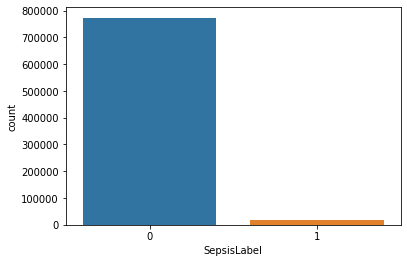

In [29]:
sns.countplot(x='SepsisLabel', data=dataset)

In [30]:
dataset.corr()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
HR,1.000000,-0.083839,0.148438,-0.025197,0.111655,0.143323,0.242178,-0.027106,0.037837,-0.037059,0.013039,-0.011782,0.013722,-0.015210,0.011416,-0.022615,0.004900,-0.007211,0.001167,0.021808,0.040696,-0.022244,-0.010613,0.003499,0.006632,0.002319,-0.015011,-0.013056,0.002997,0.033633,0.010712,0.007120,-0.176763,-0.031292,0.003749,-0.003749,-0.046150,0.031974,0.046012
O2Sat,-0.083839,1.000000,-0.019525,0.038057,0.045789,0.031492,-0.157907,-0.017416,-0.059906,0.031802,-0.031904,0.007720,-0.001538,-0.010526,-0.002014,-0.006671,0.045404,-0.004649,0.001311,-0.005197,-0.029489,-0.007257,-0.011955,-0.006614,-0.001933,0.000241,-0.027509,-0.021162,-0.007619,-0.005525,-0.002530,-0.002261,-0.043797,-0.027722,0.008135,-0.008135,0.002191,-0.046721,-0.008267
Temp,0.148438,-0.019525,1.000000,0.006585,-0.009431,-0.013121,0.086488,0.018190,-0.076629,0.062453,-0.014930,0.005141,-0.006113,-0.030664,-0.007931,-0.006367,-0.013223,-0.017016,-0.005289,-0.030795,-0.045684,-0.009767,-0.029588,0.019886,-0.011358,0.001864,-0.004825,-0.001875,-0.032181,-0.002164,0.013468,0.003896,-0.060743,0.032793,-0.050364,0.050364,0.024548,0.055791,0.023842
SBP,-0.025197,0.038057,0.006585,1.000000,0.742019,0.417586,0.052608,0.014811,-0.033502,0.048083,-0.001913,0.045129,0.007655,0.000497,-0.001134,0.028689,-0.008617,0.010783,0.001053,0.009418,-0.034848,-0.016265,-0.007196,-0.035579,0.002365,-0.001397,0.024689,0.023680,-0.023726,-0.012857,0.003421,0.002718,0.000721,-0.008880,0.163079,-0.163079,0.032576,0.086636,-0.005081
MAP,0.111655,0.045789,-0.009431,0.742019,1.000000,0.605936,0.047588,0.006410,-0.019004,0.034976,-0.001980,0.028245,0.017044,-0.017477,0.004367,0.025391,0.000166,0.001515,0.002105,0.012459,-0.020807,-0.023554,-0.008679,-0.034399,0.006177,-0.000740,0.054269,0.051824,-0.012600,-0.006775,0.006424,0.003938,-0.158985,0.022879,0.185476,-0.185476,0.035068,0.049792,-0.004659
DBP,0.143323,0.031492,-0.013121,0.417586,0.605936,1.000000,0.034500,0.002580,-0.007103,0.026048,-0.001768,0.020300,0.021904,-0.018666,0.002586,0.011904,0.006512,-0.008604,0.005341,0.012033,-0.008176,-0.022641,-0.003921,-0.028952,0.012132,-0.000672,0.054085,0.051748,-0.010071,0.000410,0.005385,0.004139,-0.219335,0.014451,0.175657,-0.175657,0.019191,0.042128,0.007359
Resp,0.242178,-0.157907,0.086488,0.052608,0.047588,0.034500,1.000000,-0.012216,0.025965,0.010565,-0.015893,0.005712,0.002151,0.009441,0.009376,-0.000172,-0.020899,-0.001826,-0.002846,0.004868,0.023425,-0.001458,-0.010315,0.001368,0.004101,-0.000506,0.002256,-0.000732,0.005206,0.006697,0.005758,0.012119,0.033309,0.006026,0.025138,-0.025138,-0.038492,0.114968,0.053377
HCO3,-0.027106,-0.017416,0.018190,0.014811,0.006410,0.002580,-0.012216,1.000000,-0.024365,0.117282,0.128235,0.012868,-0.056043,-0.155035,-0.050803,0.192633,-0.375349,-0.152429,-0.007585,-0.083061,-0.106168,0.025202,-0.108503,-0.127915,-0.049996,-0.021201,0.036477,0.023950,-0.058941,-0.079052,0.004865,0.077561,0.005466,0.012128,-0.002297,0.002297,-0.005931,0.032680,-0.004174
FiO2,0.037837,-0.059906,-0.076629,-0.033502,-0.019004,-0.007103,0.025965,-0.024365,1.000000,-0.093960,0.039582,-0.048072,0.008529,0.009404,0.002940,-0.002175,0.040884,0.009118,0.000437,0.037242,0.075762,-0.000210,0.020404,0.001983,0.003283,0.002775,0.015118,0.008533,0.035010,0.040072,-0.008490,-0.008161,0.010123,0.020326,-0.055548,0.055548,-0.000136,-0.048159,0.013485
pH,-0.037059,0.031802,0.062453,0.048083,0.034976,0.026048,0.010565,0.117282,-0.093960,1.000000,-0.396701,0.063594,-0.007040,-0.047403,-0.006532,0.027359,-0.056658,-0.042319,0.004452,-0.078514,-0.246610,-0.003517,-0.090202,-0.124766,0.003911,-0.000668,-0.043083,-0.019792,-0.041681,-0.044848,0.012024,0.003083,-0.004085,0.001282,0.025951,-0.025951,-0.001150,

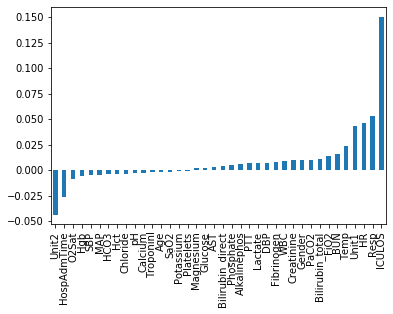

In [31]:
dataset.corr()['SepsisLabel'][:-1].sort_values().plot(kind='bar')

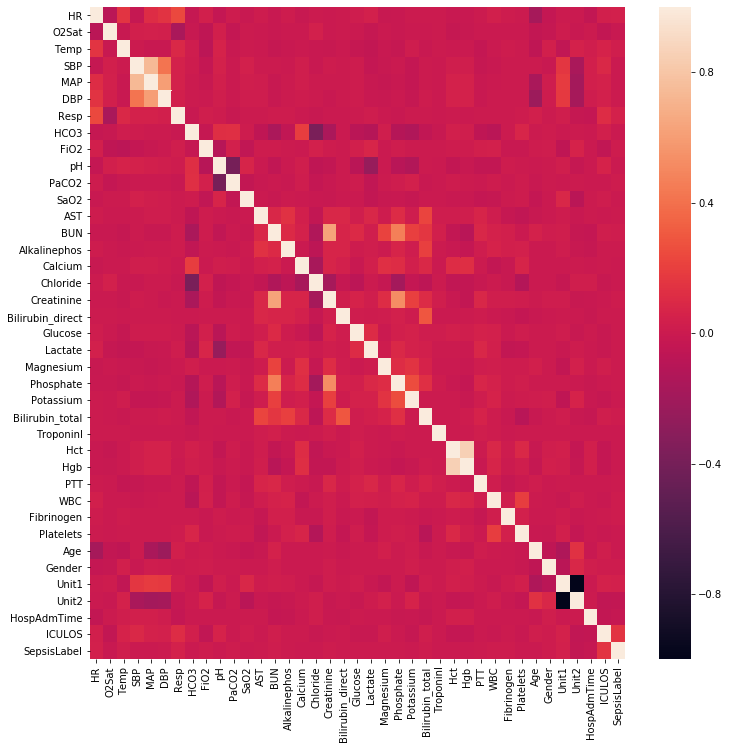

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr())

In [34]:
X=np.array(dataset.drop(['SepsisLabel'],1))
y=np.array(dataset['SepsisLabel'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (790215, 38)
Shape of y: (790215,)


In [44]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (553150, 38)
Number transactions y_train dataset:  (553150,)
Number transactions X_test dataset:  (237065, 38)
Number transactions y_test dataset:  (237065,)


In [36]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 11940
Before OverSampling, counts of label '0': 541210 

After OverSampling, the shape of train_X: (1082420, 38)
After OverSampling, the shape of train_y: (1082420,) 

After OverSampling, counts of label '1': 541210
After OverSampling, counts of label '0': 541210


In [0]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [49]:
print ('Validation Results')
print(clf_rf.score(X_test, y_test))
print (recall_score(y_test, clf_rf.predict(X_test)))

Validation Results
0.9785712779195579
0.16435719784449576


In [0]:
dataset.hist(figsize=(20,20 ))
f=plt.show()


In [0]:
#plt.savefig("abc.png")

In [0]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(dataset,figsize=(39,39))
#plt.show()

In [0]:
X=np.array(dataset.drop(['SepsisLabel'],1))
y=np.array(dataset['SepsisLabel'])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [0]:
seed=123
scoring='accuracy'

In [0]:
models=[]
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

In [0]:
results=[]
names =[]
for name, model in models:
  kfold=model_selection.KFold(n_splits=10, random_state=seed)
  cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
  print(msg)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X_standardized=sc_X.transform(X)
data=pd.DataFrame(X_standardized)
data.describe()


In [0]:
X_standardized['SepsisLabel'].value_counts()

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

In [0]:
y_train

In [0]:
np.any(np.isnan(dataset))

In [0]:
np.all(np.isfinite(dataset))

In [0]:
dataset.fillna(999, inplace=True)

In [0]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [0]:
cm

In [0]:
from matplotlib.colors import ListedColormap

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [0]:
from sklearn.decomposition import PCA
X = dataset.iloc[:,2:39]
y = dataset.iloc[:,40]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Sepsis Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [0]:
def plot_bank(X, y, fitted_model):
  plt.figure(figsize=(9.8,5), dpi=100)
  for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
    plt.subplot(1,2,i+1)
    mesh_step_size = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    if i == 0:
       Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
         try:
           Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
         except:
             plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                      verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
             plt.axis('off')
             break
             Z = Z.reshape(xx.shape)
             plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
             plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
             plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                        extent=(x_min, x_max, y_min, y_max), origin='lower')
             plt.title(plot_type + '\n' + 
                       str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
plt.gca().set_aspect('equal');
plt.tight_layout()
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()